In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rgb_to_cmy(img_rgb):
    """Convert RGB image to CMY."""
    c = 1 - img_rgb[:, :, 0] / 255.0
    m = 1 - img_rgb[:, :, 1] / 255.0
    y = 1 - img_rgb[:, :, 2] / 255.0
    return c, m, y

def rgb_to_cmyk(img_rgb):
    """Convert RGB image to CMYK."""
    R = img_rgb[:, :, 0] / 255.0
    G = img_rgb[:, :, 1] / 255.0
    B = img_rgb[:, :, 2] / 255.0

    K = 1 - np.max([R, G, B], axis=0)
    denom = 1 - K + 1e-8  # prevent division by zero
    C = (1 - R - K) / denom
    M = (1 - G - K) / denom
    Y = (1 - B - K) / denom

    # Clamp between 0 and 1
    C = np.clip(C, 0, 1)
    M = np.clip(M, 0, 1)
    Y = np.clip(Y, 0, 1)
    K = np.clip(K, 0, 1)

    return C, M, Y, K


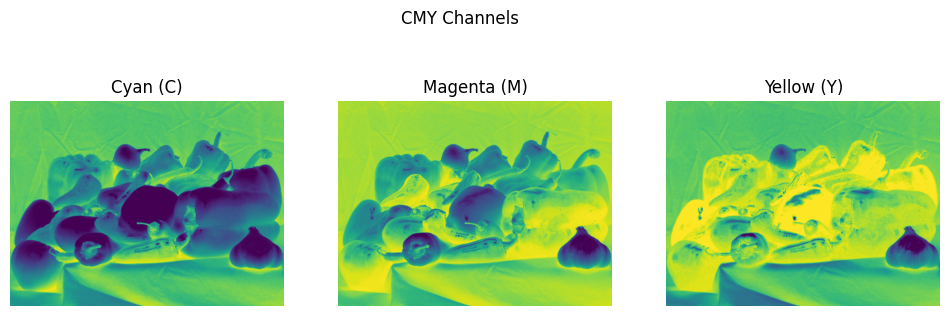

In [3]:
def show_channel(channel, title):
    """Display a single channel."""
    plt.imshow(channel, cmap=)
    plt.title(title)
    plt.axis('off')

# Load the image
img_bgr = cv2.imread('/content/peppers.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Convert to CMY and CMYK
C, M, Y = rgb_to_cmy(img_rgb)
Ck, Mk, Yk, K = rgb_to_cmyk(img_rgb)

# Plot CMY channels
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
show_channel(C, 'Cyan (C)')

plt.subplot(1, 3, 2)
show_channel(M, 'Magenta (M)')

plt.subplot(1, 3, 3)
show_channel(Y, 'Yellow (Y)')

plt.suptitle('CMY Channels')
plt.show()


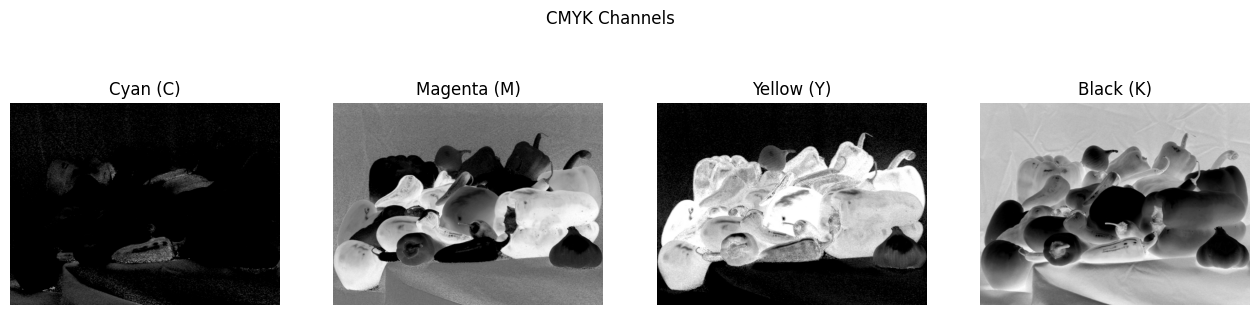

In [4]:

# Plot CMYK channels
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
show_channel(Ck, 'Cyan (C)')

plt.subplot(1, 4, 2)
show_channel(Mk, 'Magenta (M)')

plt.subplot(1, 4, 3)
show_channel(Yk, 'Yellow (Y)')

plt.subplot(1, 4, 4)
show_channel(K, 'Black (K)')

plt.suptitle('CMYK Channels')
plt.show()
